## EDA

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


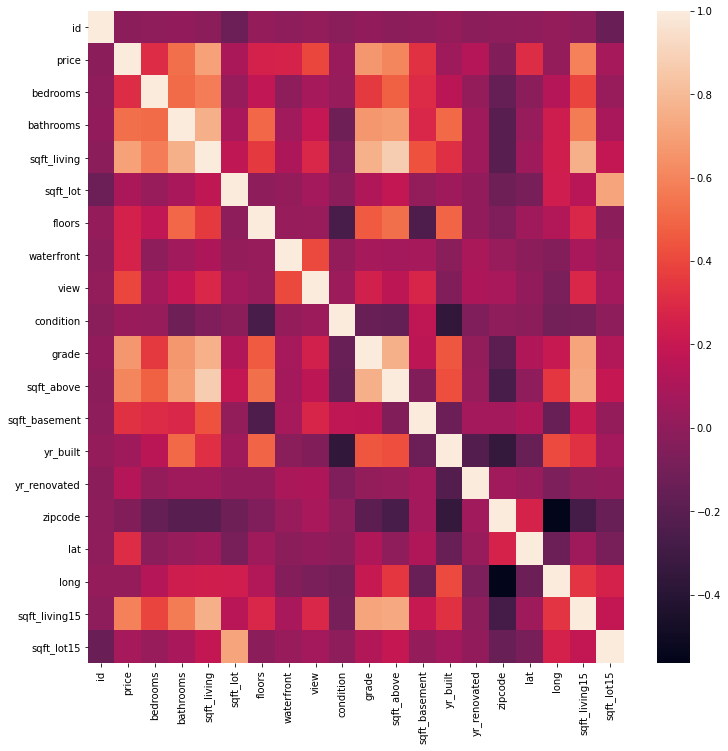

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
#1
df = pd.read_csv('kc_house_data.csv')

# Correlation Plot Heatmap
plt.figure(figsize= (12, 12))
sns.heatmap(df.corr())
df.corr(method='pearson')


Most Positive: Sqft, Bedrooms, Bathrooms
Most Negative: Zipcode, Lat, Long

(2). Sale numbers Vs. (years,months) and Sale prices correlation Vs. (years,months)

Text(0.5, 1.0, '2014 and 2015 sale numbers')

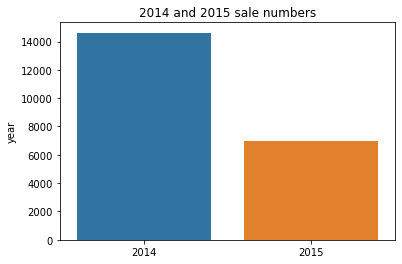

In [62]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
month = df['month'].value_counts()
year = df['year'].value_counts()
sns.barplot(year.index.tolist(),year)
plt.title("2014 and 2015 sale numbers")

Text(0.5, 1.0, 'sale numbers in each month')

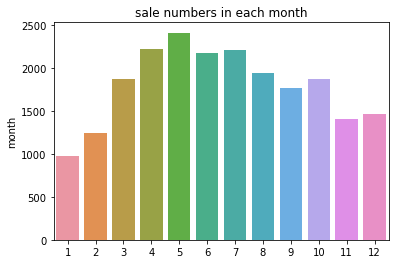

In [63]:
sns.barplot(month.index.tolist(),month)
plt.title("sale numbers in each month")

Text(0.5, 1.0, 'Price vs. Year')

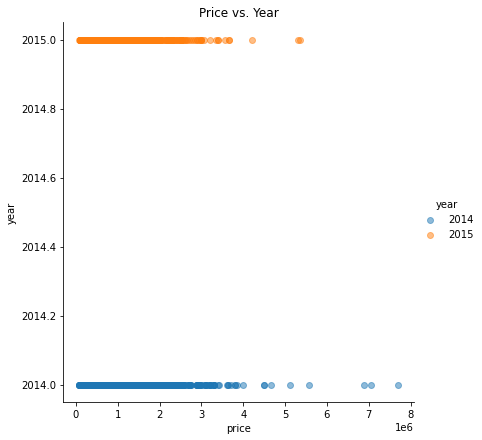

In [64]:
g=sns.FacetGrid(df,hue='year',height=6)
g.map(plt.scatter,'price','year',alpha=0.5)
g.add_legend()
plt.title("Price vs. Year")

Text(0.5, 1.0, 'Price vs. month')

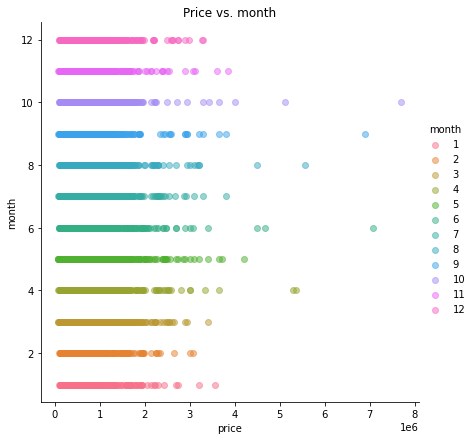

In [65]:
g=sns.FacetGrid(df,hue='month',height=6)
g.map(plt.scatter,'price','month',alpha=0.5)
g.add_legend()
plt.title("Price vs. month")

In [66]:
print("Price correlation with year: ",df['price'].corr(df['year']))
print("Price correlation with month: ",df['price'].corr(df['month']))

Price correlation with year:  0.003727139624315499
Price correlation with month:  -0.009928289245273971


[322000. 450000. 645000.]


[Text(0, 0.5, 'density')]

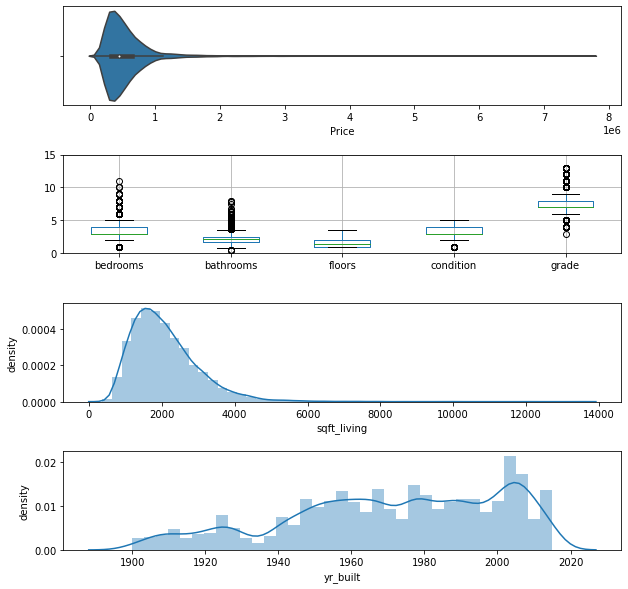

In [67]:
#3 from sklearn.linear_model import LinearRegression
fig, (ax, box, sq, yr) = plt.subplots(4, figsize=(10,10))
plt.subplots_adjust(hspace = .5)
# Price
ax = sns.violinplot(ax = ax, x = df['price'])
print(np.percentile(df['price'], [25, 50, 75]))
ax.set(xlabel = 'Price')

#'bedrooms', 'bathrooms', 'floors', 'condition'
box = df.boxplot(ax = box, column = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade'])
box.set_ylim([0,15])

# Square feet living room
sq = sns.distplot(df.sqft_living, ax = sq)
sq.set(ylabel = 'density')

# Year built
yr = sns.distplot(df.yr_built, ax = yr)
yr.set(ylabel = 'density')

1 The first graph shows the distribution of prices in a violin plot. We can tell the 25-75% quartile is between $322,000 and $645,000
2 The second plot shows the box plots of bedrooms, bathrooms, floors, condition, grade. The medians are:
    Bedrooms ~ 3
    Bathrooms ~ 2.5
    Floors ~ 2
    Condition ~ 3
    Grade ~ 7
3 The third plot shows the distribution of square foot in living room. This plot is skewed with the most being ~1800 sqft
4 The last plot is the distribution of houses built over time. There has been a recent phase of construction in the 2000s, which means many houses are newly built and in decent condition.
    

(4). Create the scoring function for 'Grade' with accuracy:70%

In [68]:
X=df[['price','bedrooms','bathrooms','sqft_living15','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predit=clf.predict(X_test)

In [70]:
variables = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
variables

price            0.207003
sqft_living15    0.200625
yr_built         0.148349
sqft_lot15       0.129360
zipcode          0.097564
bathrooms        0.088222
floors           0.039792
bedrooms         0.039237
condition        0.023602
view             0.015830
yr_renovated     0.009228
waterfront       0.001188
dtype: float64

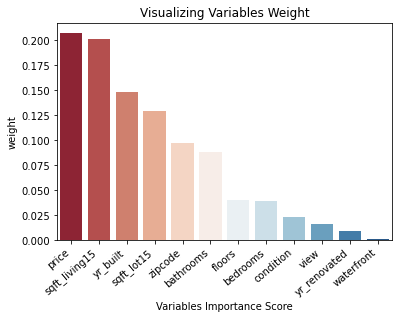

In [71]:
ax=sns.barplot(x=variables.index, y=variables,palette=sns.color_palette("RdBu", 12))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# Add labels to your graph
plt.xlabel('Variables Importance Score')
plt.ylabel('weight')
plt.title("Visualizing Variables Weight")
plt.show()

In [72]:
print("Scoring function accuracy:",metrics.accuracy_score(y_test, y_predit))

Scoring function accuracy: 0.6978395061728395


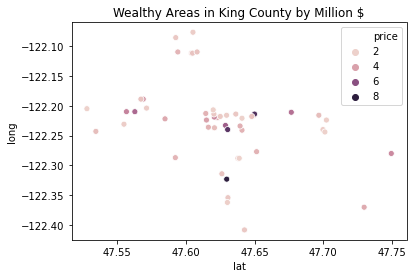

In [73]:
#5
import seaborn as sns

wealthy = df.loc[df['price'] >= 3000000]

plt.title("Wealthy Areas in King County by Million $")
ax = sns.scatterplot(x=wealthy.lat, y=wealthy.long, hue=wealthy.price)


## Modeling

### Linear Regression

In [74]:
X=df[['bedrooms','bathrooms','sqft_living15','grade','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'distribution of house prices')

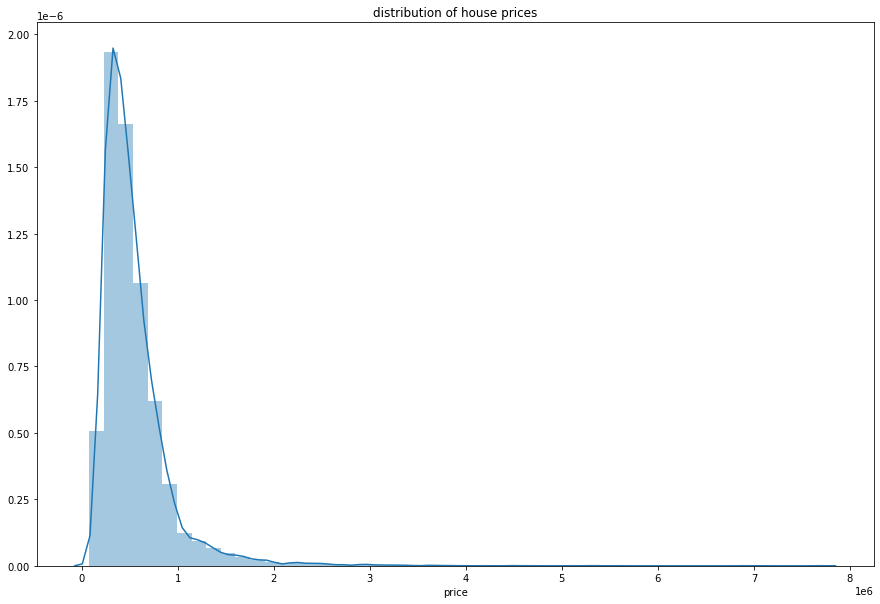

In [75]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price'])
plt.title("distribution of house prices")

In [76]:
reg = LinearRegression()
reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-5450.988933
bathrooms,117738.326770
sqft_living15,87.593633
grade,155061.065637
sqft_lot15,-0.254915
floors,19202.780808
waterfront,626799.808457
condition,21715.815162
yr_built,-4159.997373
zipcode,52.681775


In [77]:
y_predit = reg.predict(X_test)
accurate_rate=1-np.mean(np.abs(y_predit-y_test)/y_test)
print("Accuracy: ",accurate_rate)


Accuracy:  0.6919052903203426


In [78]:
result = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_predit})
result.head(8)

,Actual price,Predicted price
15923,279000.0,410862.181731
760,565000.0,558983.663389
21541,530000.0,443872.010897
6091,302000.0,359798.502064
6271,435000.0,708855.350446
11170,525000.0,436397.003055
20655,310000.0,280622.271501
763,374950.0,373464.988084


Model accuracy:  0.6919052903203426


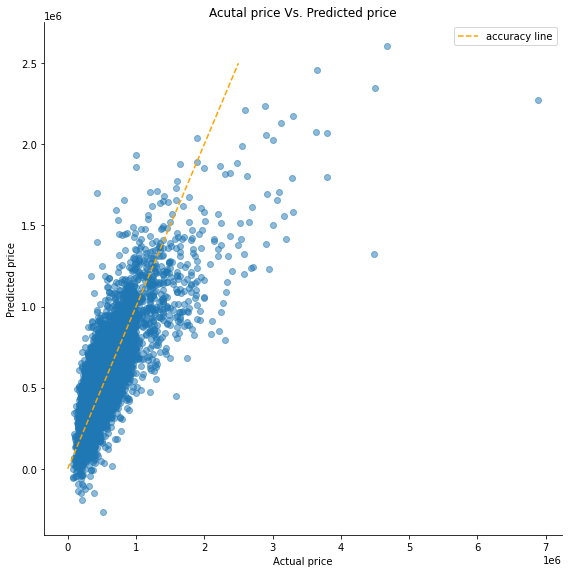

In [79]:
g = sns.FacetGrid(result,height=8)
g.map(plt.scatter,'Actual price','Predicted price',alpha=0.5)
plt.plot([0,2500000],[0,2500000],ls='--',color='orange',label='accuracy line')
plt.title("Acutal price Vs. Predicted price")
plt.legend()
print("Model accuracy: ",accurate_rate)

Linear regression is a model to find possible W, in "Y= XW+error" which has minimum Mean squared error(MSE). This linear regression model accuracy rate is around 66%.

### Random Forest Model

In [80]:
X=df[['bedrooms','bathrooms','sqft_living15','grade','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)
y_predit=clf.predict(X_test)

In [81]:
variables = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
variables

grade            0.507429
yr_built         0.113978
zipcode          0.098742
sqft_living15    0.077054
bathrooms        0.065604
sqft_lot15       0.049521
view             0.024773
waterfront       0.024266
bedrooms         0.013208
condition        0.009076
yr_renovated     0.008426
floors           0.007922
dtype: float64

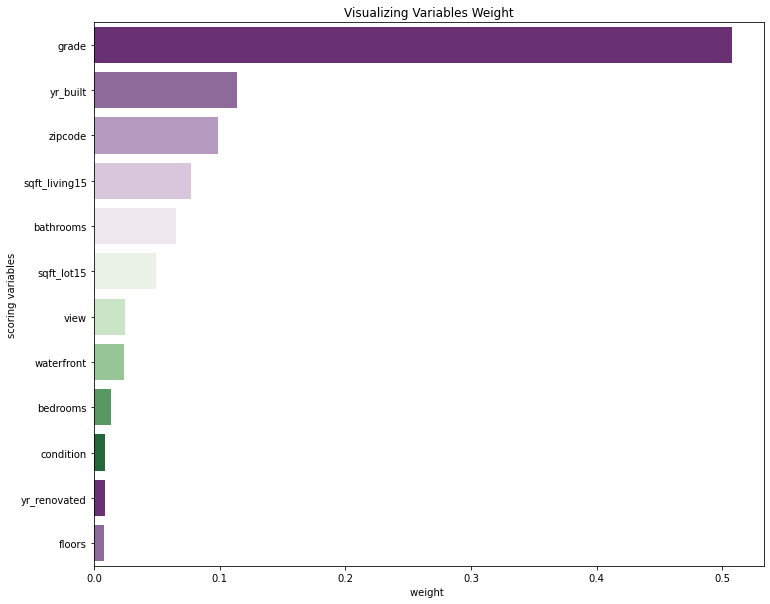

In [82]:
ax=sns.barplot(x=variables, y=variables.index,palette=sns.color_palette("PRGn", 10))
ax.figure.set_size_inches(12,10)
# Add labels to your graph
plt.xlabel('weight ')
plt.ylabel('scoring variables')
plt.title("Visualizing Variables Weight")
plt.show()

Model accuracy:  0.6919052903203426


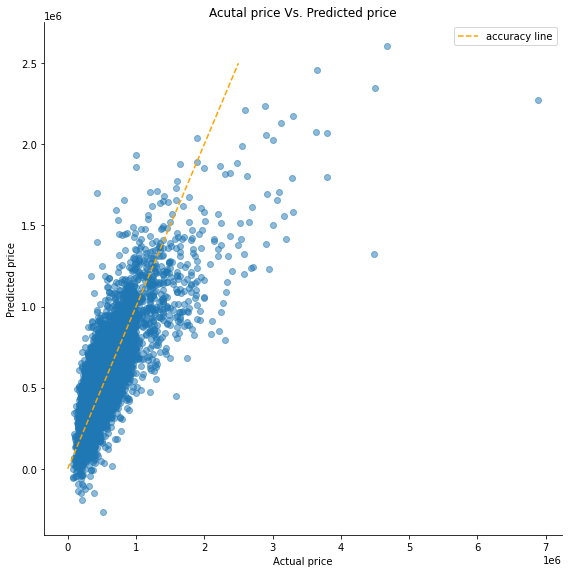

In [83]:
g = sns.FacetGrid(result,height=8)
g.map(plt.scatter,'Actual price','Predicted price',alpha=0.5)
plt.plot([0,2500000],[0,2500000],ls='--',color='orange',label='accuracy line')
plt.title("Acutal price Vs. Predicted price")
plt.legend()
print("Model accuracy: ",accurate_rate)

In [84]:
accurate_rate=1-np.mean(np.abs(y_predit-y_test)/y_test)
print("Random Forest accuracy:",accurate_rate)

Random Forest accuracy: 0.8261395691303726


Random forest regression is to select random samples and build decision trees for each sample. Then, Perform a vote for each predicted result and select the prediction result with the most votes as the final prediction. The Random forest model has accuracy rate around 81%.



### K Nearest Neighbors

In [85]:
from sklearn import neighbors
X=df[['bedrooms','bathrooms','floors','grade','sqft_living15','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = neighbors.KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [86]:
result = pd.DataFrame({'Actual price': y_test, 'Predicted price': preds})
result.head(8)

,Actual price,Predicted price
6025,300000.0,351050.0
6357,264950.0,364545.0
1908,400000.0,521080.0
8163,470500.0,343140.0
18756,315000.0,393145.0
5837,616000.0,247950.0
10008,291600.0,410350.0
8642,249000.0,241128.0


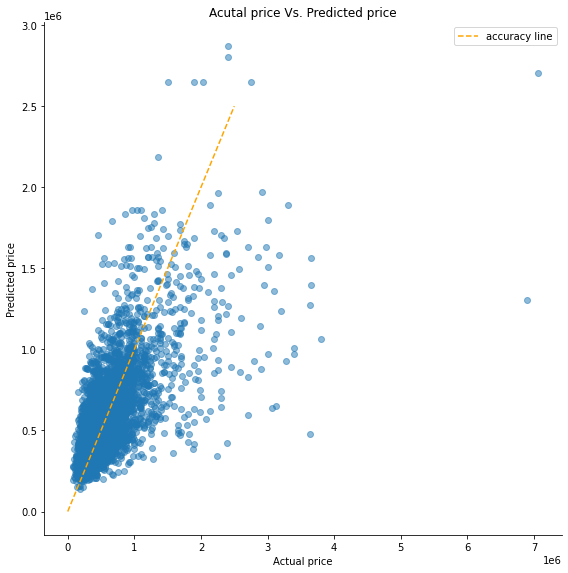

In [87]:
g = sns.FacetGrid(result,height=8)
g.map(plt.scatter,'Actual price','Predicted price',alpha=0.5)
plt.plot([0,2500000],[0,2500000],ls='--',color='orange',label='accuracy line')
plt.title("Acutal price Vs. Predicted price")
plt.legend()

In [88]:
print('Nearest Neighbors Accuracy: ', model.score(X_test, y_test))

Nearest Neighbors Accuracy:  0.46316299843696496


KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

This method is not the best because it yielded a ~45% accuracy.

In [89]:
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

This method is not the best because it yielded a ~45% accuracy.

SyntaxError: invalid syntax (<ipython-input-89-bf6d3144be4b>, line 1)

Random forest regression is to select random samples and build decision trees for each sample. Then, Perform a vote for each predicted result and select the prediction result with the most votes as the final prediction. The Random forest model has accuracy rate around 81%.



### K Nearest Neighbors

In [ ]:
from sklearn import neighbors
X=df[['bedrooms','bathrooms','floors','grade','sqft_living15','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = neighbors.KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
result = pd.DataFrame({'Actual price': y_test, 'Predicted price': preds})
result.head(8)

In [ ]:
g = sns.FacetGrid(result,height=8)
g.map(plt.scatter,'Actual price','Predicted price',alpha=0.5)
plt.plot([0,2500000],[0,2500000],ls='--',color='orange',label='accuracy line')
plt.title("Acutal price Vs. Predicted price")
plt.legend()

In [ ]:
print('Nearest Neighbors Accuracy: ', model.score(X_test, y_test))

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

This method is not the best because it yielded a ~45% accuracy.

In [46]:
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

This method is not the best because it yielded a ~45% accuracy.

Random Forest accuracy: 0.8081079949703387


Random forest regression is to select random samples and build decision trees for each sample. Then, Perform a vote for each predicted result and select the prediction result with the most votes as the final prediction. The Random forest model has accuracy rate around 81%.



### K Nearest Neighbors

In [96]:
from sklearn import neighbors
X=df[['bedrooms','bathrooms','floors','grade','sqft_living15','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = neighbors.KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)

Nearest Neighbors Accuracy:  0.4579753111121226


In [98]:
result = pd.DataFrame({'Actual price': y_test, 'Predicted price': preds})
result.head(8)

,Actual price,Predicted price
16790,1650000.0,1110250.0
15822,1160000.0,1506890.0
18857,245000.0,399985.0
3027,770000.0,580400.0
11445,390000.0,339100.0
12103,599000.0,774355.0
20975,910000.0,711174.5
7508,450000.0,463150.0


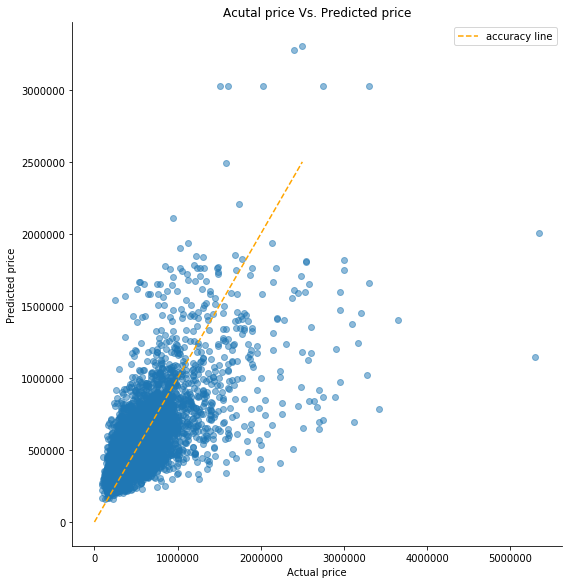

In [99]:
g = sns.FacetGrid(result,height=8)
g.map(plt.scatter,'Actual price','Predicted price',alpha=0.5)
plt.plot([0,2500000],[0,2500000],ls='--',color='orange',label='accuracy line')
plt.title("Acutal price Vs. Predicted price")
plt.legend()

In [97]:
print('Nearest Neighbors Accuracy: ', model.score(X_test, y_test))

Nearest Neighbors Accuracy:  0.4579753111121226


KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

This method is not the best because it yielded a ~45% accuracy.